**기본 세팅**

In [1]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

mpl.rc('font', family='NanumGothic') # 폰트 설정
mpl.rc('axes', unicode_minus=False) # 유니코드에서 음수 부호 설정

# 차트 스타일 설정
sns.set(font="NanumGothic", rc={"axes.unicode_minus":False}, style='darkgrid')
plt.rc("figure", figsize=(10,8))

warnings.filterwarnings("ignore")

---

# 11. 데이터 다루기

이번 챕터에서는 피마 인디언 데이터를 이용해서 딥러닝 모델을 실행해볼 것이다.

참고로 [머신러닝 완벽가이드](https://romg2.github.io/mlguide/02_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-%EC%99%84%EB%B2%BD%EA%B0%80%EC%9D%B4%EB%93%9C-03.-%ED%8F%89%EA%B0%80/)에서 피마 인디언 데이터로 로지스틱 회귀 성능 평가를 했었다.

## 11.1 데이터 조사

먼저 사용할 데이터의 구조는 다음과 같다.

- pregnant: 과거 임신 횟수


- plasma: 포도당 부하 검사 2시간 후 공복 혈당 농도


- pressure: 확장기 혈압


- thickness: 삼두근 피부 주름 두께


- insulin: 혈청 인슐린


- BMI: 체질량 지수


- pedigree: 당뇨병 가족력


- age: 나이


- class: 당뇨 여부 (타겟)

In [3]:
# 데이터 불러오기
df = pd.read_csv("deeplearning/dataset/pima-indians-diabetes.csv",
                names = ["pregnant", "plasma", "pressure", "thickness", 
                         "insulin", "BMI", "pedigree", "age", "class"])
df.head()

,pregnant,plasma,pressure,thickness,insulin,BMI,pedigree,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


- 데이터를 불러왔으며 csv 파일에 헤더 정보가 없어 `names`로 직접 지정하였다.

In [4]:
df.shape

(768, 9)

- 총 768개의 샘플로 8개의 피처, 타겟으로 구성되어 있다.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pregnant   768 non-null    int64  
 1   plasma     768 non-null    int64  
 2   pressure   768 non-null    int64  
 3   thickness  768 non-null    int64  
 4   insulin    768 non-null    int64  
 5   BMI        768 non-null    float64
 6   pedigree   768 non-null    float64
 7   age        768 non-null    int64  
 8   class      768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


- 결측값은 없다.

In [6]:
df[["pregnant", "class"]].groupby(["pregnant"], as_index=False).mean().sort_values(by="pregnant", ascending=True)

,pregnant,class
0,0,0.342342
1,1,0.214815
2,2,0.184466
3,3,0.360000
4,4,0.338235
5,5,0.368421
6,6,0.320000
7,7,0.555556
8,8,0.578947
9,9,0.642857


- 간단하게 임신 횟수와 당뇨병 발병 확률에 대해 살펴봤다.


- `groupby()`에 `as_index`를 False로 설정하여서 바로 컬럼으로 사용 가능하다.

## 11.2 데이터 시각화

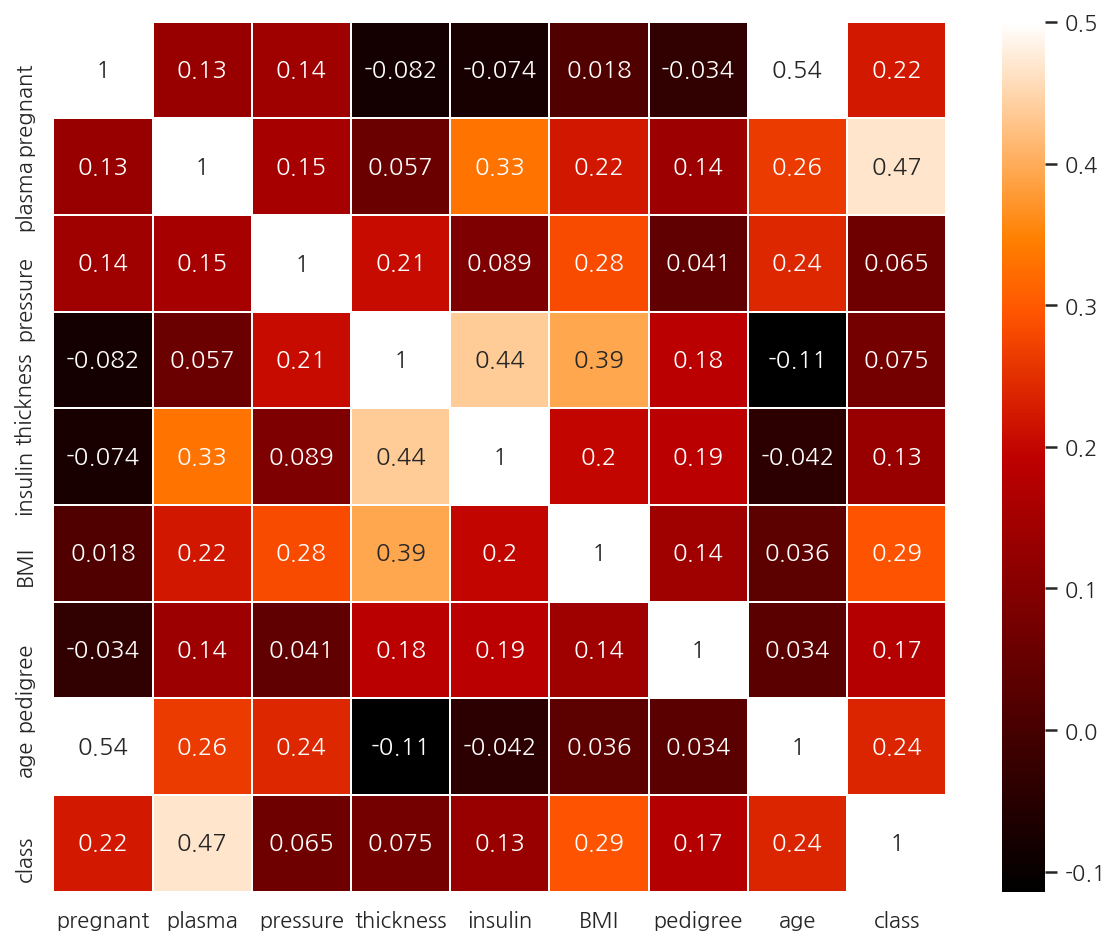

In [7]:
corr_M = df.corr()

#
sns.heatmap(corr_M,
            linewidths=0.1, 
            vmax = 0.5, # 색상의 밝기 조절
            cmap = plt.cm.gist_heat, 
            annot=True)

plt.show()

- class와 가장 높은 상관관계를 가지는 피처는 plasma로 나타난다.


- 두 관계를 좀 더 자세히 살펴보자.

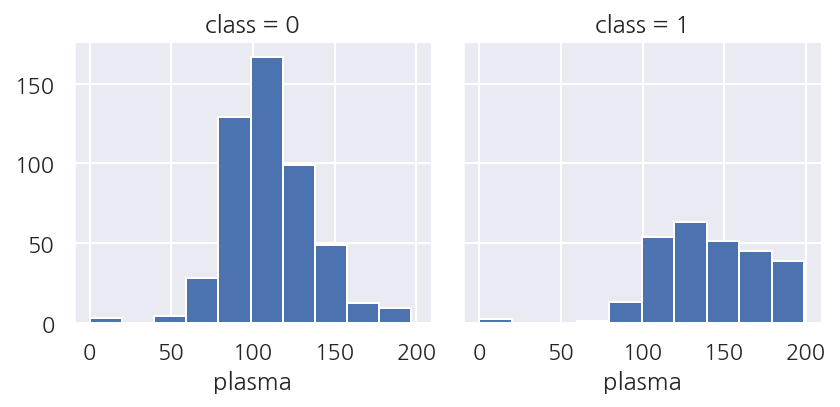

In [8]:
grid = sns.FacetGrid(df, col="class")
grid.map(plt.hist, "plasma", bins=10)

plt.show()

- class가 1인 경우는 plasma가 높은 값이 많았으며 특히 150인 이상인 경우가 많다.


- plasma가 class를 구분하는데 중요한 피처임을 알 수 있다.


- 참고로 머신러닝의 경우는 중요한 피처를 뽑는 과정도 데이터 전처리 과정에 포함하는 반면,


- 딥러닝은 중요한 피처를 내부적으로 뽑아주므로 이 과정이 필요 없다고 한다.


- 머신러닝에서도 feature_importance를 사용한 경험이 있는데 좀 더 딥러닝을 봐야 차이를 알 것 같다.

## 11.3 예측

In [ ]:
import tensorflow as tf

# 시드 설정
np.random.seed(3)
tf.random.set_seed(3)

# 데이터 불러오기
dataset = np.loadtxt("deeplearning/dataset/pima-indians-diabetes.csv", delimiter = ",")
X = dataset[:,:8]
Y = dataset[:,8]

- 사실 시드 설정은 모델 실행이랑 같은 셀에 넣어두어야 하는데 따로 보려고 분리해두었다.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 모델 설정
model = Sequential()
model.add(Dense(12, input_dim=8, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

- 모델은 입력층에 모든 피처를 사용하며 2개의 은닉층을 거쳐 1개의 값을 출력하게 설정하였다.

In [ ]:
# 모델 컴파일
model.compile(loss="binary_crossentropy",
              optimizer="adam", 
              metrics=["accuracy"])

- 오차 함수는 이진 분류 문제이므로 binary_crossentropy를 사용하였다.


- 최적화 함수로는 adam을 사용하며 평가 지표는 accuracy를 사용한다.

In [ ]:
# 모델 실행
model.fit(X, Y, epochs=10, batch_size=768)

# 결과 출력
print(f"Accuracy: {model.evaluate(X,Y, verbose=0)[1]: .4f}")

- 모델을 실행하고 평가한다.


- `evaluate()`는 loss와 metrics 2개의 값을 가지고 있다.


- 왜인지는 모르겠지만 `evaluate()`에서 `verbose`를 설정하지 않으면 등호가 엄청나게 출력된다.


- 개인 설정 문제인 듯 하다.

In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 시드 설정
np.random.seed(3)
tf.random.set_seed(3)

# 데이터 불러오기
dataset = np.loadtxt("deeplearning/dataset/pima-indians-diabetes.csv", delimiter = ",")
X = dataset[:,:8]
Y = dataset[:,8]

# 모델 설정
model = Sequential()
model.add(Dense(12, input_dim=8, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

# 모델 컴파일
model.compile(loss="binary_crossentropy",
              optimizer="adam", 
              metrics=["accuracy"])

# 모델 실행
model.fit(X, Y, epochs=200, batch_size=10)

# 결과 출력
print("-"*100)
print(f"Accuracy: {model.evaluate(X,Y, verbose=0)[1]: .4f}")

Train on 768 samples
Epoch 1/200
768/768 [==============================] - 1s 880us/sample - loss: 11.4155 - accuracy: 0.6198
Epoch 2/200
768/768 [==============================] - 0s 141us/sample - loss: 6.4242 - accuracy: 0.6159
Epoch 3/200
768/768 [==============================] - 0s 123us/sample - loss: 3.6949 - accuracy: 0.5221
Epoch 4/200
768/768 [==============================] - 0s 134us/sample - loss: 2.2150 - accuracy: 0.5169
Epoch 5/200
768/768 [==============================] - 0s 144us/sample - loss: 1.3725 - accuracy: 0.5182
Epoch 6/200
768/768 [==============================] - 0s 224us/sample - loss: 0.9083 - accuracy: 0.5586
Epoch 7/200
768/768 [==============================] - 0s 160us/sample - loss: 0.7783 - accuracy: 0.5547
Epoch 8/200
768/768 [==============================] - 0s 153us/sample - loss: 0.7476 - accuracy: 0.6172 - loss: 0.7556 - accuracy: 0.61
Epoch 9/200
768/768 [==============================] - 0s 260us/sample - loss: 0.7330 - accuracy: 0.6615
E

768/768 [==============================] - 0s 253us/sample - loss: 0.5342 - accuracy: 0.7070
Epoch 78/200
768/768 [==============================] - 0s 258us/sample - loss: 0.5329 - accuracy: 0.7135
Epoch 79/200
768/768 [==============================] - 0s 272us/sample - loss: 0.5319 - accuracy: 0.7148
Epoch 80/200
768/768 [==============================] - 0s 243us/sample - loss: 0.5388 - accuracy: 0.7109
Epoch 81/200
768/768 [==============================] - 0s 266us/sample - loss: 0.5295 - accuracy: 0.7148
Epoch 82/200
768/768 [==============================] - 0s 251us/sample - loss: 0.5244 - accuracy: 0.7201
Epoch 83/200
768/768 [==============================] - 0s 249us/sample - loss: 0.5314 - accuracy: 0.7096
Epoch 84/200
768/768 [==============================] - 0s 252us/sample - loss: 0.5288 - accuracy: 0.7253
Epoch 85/200
768/768 [==============================] - 0s 248us/sample - loss: 0.5330 - accuracy: 0.7148
Epoch 86/200
768/768 [==============================] - 0s 

768/768 [==============================] - 0s 243us/sample - loss: 0.5196 - accuracy: 0.7266
Epoch 154/200
768/768 [==============================] - 0s 258us/sample - loss: 0.5053 - accuracy: 0.7214
Epoch 155/200
768/768 [==============================] - ETA: 0s - loss: 0.4998 - accuracy: 0.73 - 0s 259us/sample - loss: 0.5055 - accuracy: 0.7266
Epoch 156/200
768/768 [==============================] - 0s 315us/sample - loss: 0.5043 - accuracy: 0.7174
Epoch 157/200
768/768 [==============================] - 0s 312us/sample - loss: 0.5131 - accuracy: 0.7266
Epoch 158/200
768/768 [==============================] - 0s 331us/sample - loss: 0.5087 - accuracy: 0.7188
Epoch 159/200
768/768 [==============================] - 0s 361us/sample - loss: 0.5171 - accuracy: 0.7253
Epoch 160/200
768/768 [==============================] - 0s 337us/sample - loss: 0.5172 - accuracy: 0.7174
Epoch 161/200
768/768 [==============================] - 0s 264us/sample - loss: 0.5059 - accuracy: 0.7279
Epoch 162

- 약 72.53%의 정확도로 나타난다.